In [1]:
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import xarray as xr

import cmcrameri.cm as cmc
from leakage.velocity_leakage import S1DopplerLeakage, add_dca_to_leakage_class

In [2]:
data_dir = "/Users/opodriscoll/Documents/Data/Sentinel1/IW/"
# save_dir = '../../data/leakage/temp/azores_design_param_v0.nc'
# save_dir = '../../data/leakage/temp/carib_design_param_v0.nc'
# save_dir = '../../data/leakage/temp/hawaii_design_param_v0.nc'
# save_dir = '../../data/leakage/temp/iceland_design_param_v0.nc'
save_dir = '../../data/leakage/temp/scotland_design_param_v0.nc'

func_rmse = lambda x, rounding=3:  np.round(np.sqrt(np.mean(x**2)).values*1, rounding)
func_rmse_xr = lambda x, rounding=3:  np.round(np.sqrt(np.mean(x**2)), rounding)

antenna_length_multipliers = 10**(np.log10(2)*np.arange(0, 5))
antenna_length_multipliers

array([ 1.,  2.,  4.,  8., 16.])

# Process and save data

In [3]:
# noises = []
# signals = []
results = []
for i, antenna_length_multiplier in enumerate(antenna_length_multipliers):

    scenario = 'Scotland_20231109'
    files = glob.glob(f"{data_dir+scenario}/*.SAFE")

    test = S1DopplerLeakage(
        filename=files,
        f0 = 5_400_000_000,
        z0 = 823_000,
        era5_directory='../../data/leakage/era5_winds/',
        resolution_product=50_000,
        az_footprint_cutoff=80_000,
        vx_sat=6_800,
        PRF=4,
        grid_spacing=75,
        antenna_length=2.87 * antenna_length_multiplier,
        antenna_height=0.32,
        beam_pattern= 'phased_array', #'phased_array', sinc
        antenna_elements=4,
        antenna_weighting=0.75,
        swath_start_incidence_angle_scat=35,
        boresight_elevation_angle_scat=40,
        random_state = 42, # NOTE random state kept the same because we want to analyse exactly the same scene
        fill_nan_limit = 1,

        # era5_smoothing_window=30,
        # denoise = True,
        # _pulsepair_noise = True
        # _speckle_noise= True
        )
    test.apply()
    results.append(test)

/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:512: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


No pre-saved file found, instead saved loaded file as: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Scotland_20231109/6D0B_B440_BAFB_CE72_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_wind_202311.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Scotland_20231109/6D0B_B440_BAFB_CE72_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_wind_202311.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Scotland_20231109/6D0B_B440_BAFB_CE72_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_wind_202311.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Scotland_20231109/6D0B_B440_BAFB_CE72_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_wind_202311.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Scotland_20231109/6D0B_B440_BAFB_CE72_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_wind_202311.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

In [4]:
# noises = []
# signals = []
results2 = []
for i, antenna_length_multiplier in enumerate(antenna_length_multipliers):

    scenario = 'Scotland_20231109'
    files = glob.glob(f"{data_dir+scenario}/*.SAFE")

    test = S1DopplerLeakage(
        filename=files,
        f0 = 5_400_000_000,
        z0 = 823_000,
        era5_directory='../../data/leakage/era5_winds/',
        resolution_product=50_000,
        az_footprint_cutoff=80_000,
        vx_sat=6_800,
        PRF=4,
        grid_spacing=75,
        antenna_length=2.87 * antenna_length_multiplier,
        antenna_height=0.32,
        beam_pattern= 'phased_array', #'phased_array', sinc
        antenna_elements=4,
        antenna_weighting=0.75,
        swath_start_incidence_angle_scat=35,
        boresight_elevation_angle_scat=40,
        random_state = 42, # NOTE random state kept the same because we want to analyse exactly the same scene
        fill_nan_limit = 1,

        # era5_smoothing_window=30,
        # denoise = True,
        # _pulsepair_noise = True
        _speckle_noise= False
        )
    test.apply()
    results2.append(test)

/Users/opodriscoll/Documents/Scripts/DopSCA/src/leakage/velocity_leakage.py:512: UserWarning: Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0
  warnings.warn("Combination of vx_sat, PRF and grid_spacing may lead to aliasing: (vx_sat / PRF) % grid_spacing != 0")


Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Scotland_20231109/6D0B_B440_BAFB_CE72_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_wind_202311.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Scotland_20231109/6D0B_B440_BAFB_CE72_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_wind_202311.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Scotland_20231109/6D0B_B440_BAFB_CE72_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_wind_202311.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Scotland_20231109/6D0B_B440_BAFB_CE72_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_wind_202311.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

Associated file found and reloaded: /Users/opodriscoll/Documents/Data/Sentinel1/IW/Scotland_20231109/6D0B_B440_BAFB_CE72_res75.nc
Loading nearest ERA5 point w.r.t. observation from ERA5 file: ../../data/leakage/era5_winds/era5_wind_202311.nc


/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/Users/opodriscoll/miniconda3/envs/dopsca/lib/python3.12/site

In [7]:
samples = results + results2 #results #results[:3] + [results[-1]] # results

residuals = [result.data.V_leakage_pulse_rg_subscene - result.data.V_leakage_pulse_rg_subscene_inverted for result in samples]
backscatters = [result.data.nrcs_scat for result in samples]
noise = [result.data.V_sigma_subscene - result.data.V_leakage_pulse_rg_subscene_inverted for result in samples]

ds_temp = xr.Dataset()
ds_temp['residual'] = xr.concat(residuals, dim = 'la')
ds_temp['nrcs'] = xr.concat(backscatters, dim = 'la')
ds_temp['noise'] = xr.concat(noise, dim = 'la')

In [8]:
N = len(antenna_length_multipliers)
ds_res_speck = ds_temp.sel(la = range(0,N)).assign_coords(speckle=('speckle', [True]))
ds_res_no_speck = ds_temp.sel(la = range(N,2*N)).assign_coords(speckle=('speckle', [False]))
ds_res = xr.concat([ds_res_speck, ds_res_no_speck], dim = 'speckle')
ds_res = ds_res.assign_coords(la = ('la', 2.87 * antenna_length_multipliers))
ds_res

<xarray.Dataset> Size: 235MB
Dimensions:    (slow_time: 335, grg: 3506, speckle: 2, la: 5)
Coordinates:
  * slow_time  (slow_time) float64 3kB 4.08e+04 4.25e+04 ... 6.069e+05 6.086e+05
  * grg        (grg) float64 28kB 5.763e+05 5.763e+05 ... 8.391e+05 8.391e+05
  * speckle    (speckle) bool 2B True False
  * la         (la) float64 40B 2.87 5.74 11.48 22.96 45.92
Data variables:
    residual   (speckle, la, grg, slow_time) float64 94MB dask.array<chunksize=(1, 1, 3506, 335), meta=np.ndarray>
    nrcs       (speckle, la, grg, slow_time) float32 47MB dask.array<chunksize=(1, 1, 3506, 335), meta=np.ndarray>
    noise      (speckle, la, grg, slow_time) float64 94MB dask.array<chunksize=(1, 1, 3506, 335), meta=np.ndarray>

In [9]:
ds_res.to_netcdf(save_dir)

# Load data if already processed

In [10]:
ds_res = xr.open_dataset(save_dir)
ds_res

<xarray.Dataset> Size: 235MB
Dimensions:    (slow_time: 335, grg: 3506, speckle: 2, la: 5)
Coordinates:
  * slow_time  (slow_time) float64 3kB 4.08e+04 4.25e+04 ... 6.069e+05 6.086e+05
  * grg        (grg) float64 28kB 5.763e+05 5.763e+05 ... 8.391e+05 8.391e+05
  * speckle    (speckle) bool 2B True False
  * la         (la) float64 40B 2.87 5.74 11.48 22.96 45.92
Data variables:
    residual   (speckle, la, grg, slow_time) float64 94MB ...
    nrcs       (speckle, la, grg, slow_time) float32 47MB ...
    noise      (speckle, la, grg, slow_time) float64 94MB ...

In [11]:
clip = ds_res['residual']/ds_res['residual']
ds_res['noise'] = ds_res['noise'] * clip

ds_residual_mean = ds_res['residual'].mean(dim = 'la')
ds_residual_std = ds_res['residual'].std(dim = 'la')
ds_noise_mean = ds_res['noise'].mean(dim = 'la')

In [12]:
ds_res['residual'].isel(speckle = 0).groupby('la',squeeze=False).map(func_rmse_xr).values, ds_res['residual'].isel(speckle = 1).groupby('la',squeeze=False).map(func_rmse_xr).values

(array([0.472, 0.119, 0.031, 0.008, 0.003]),
 array([0.36 , 0.09 , 0.024, 0.006, 0.003]))

/var/folders/90/d6h21jb17nz43871lx63sp_141mt08/T/ipykernel_12845/2318238861.py:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, 65])


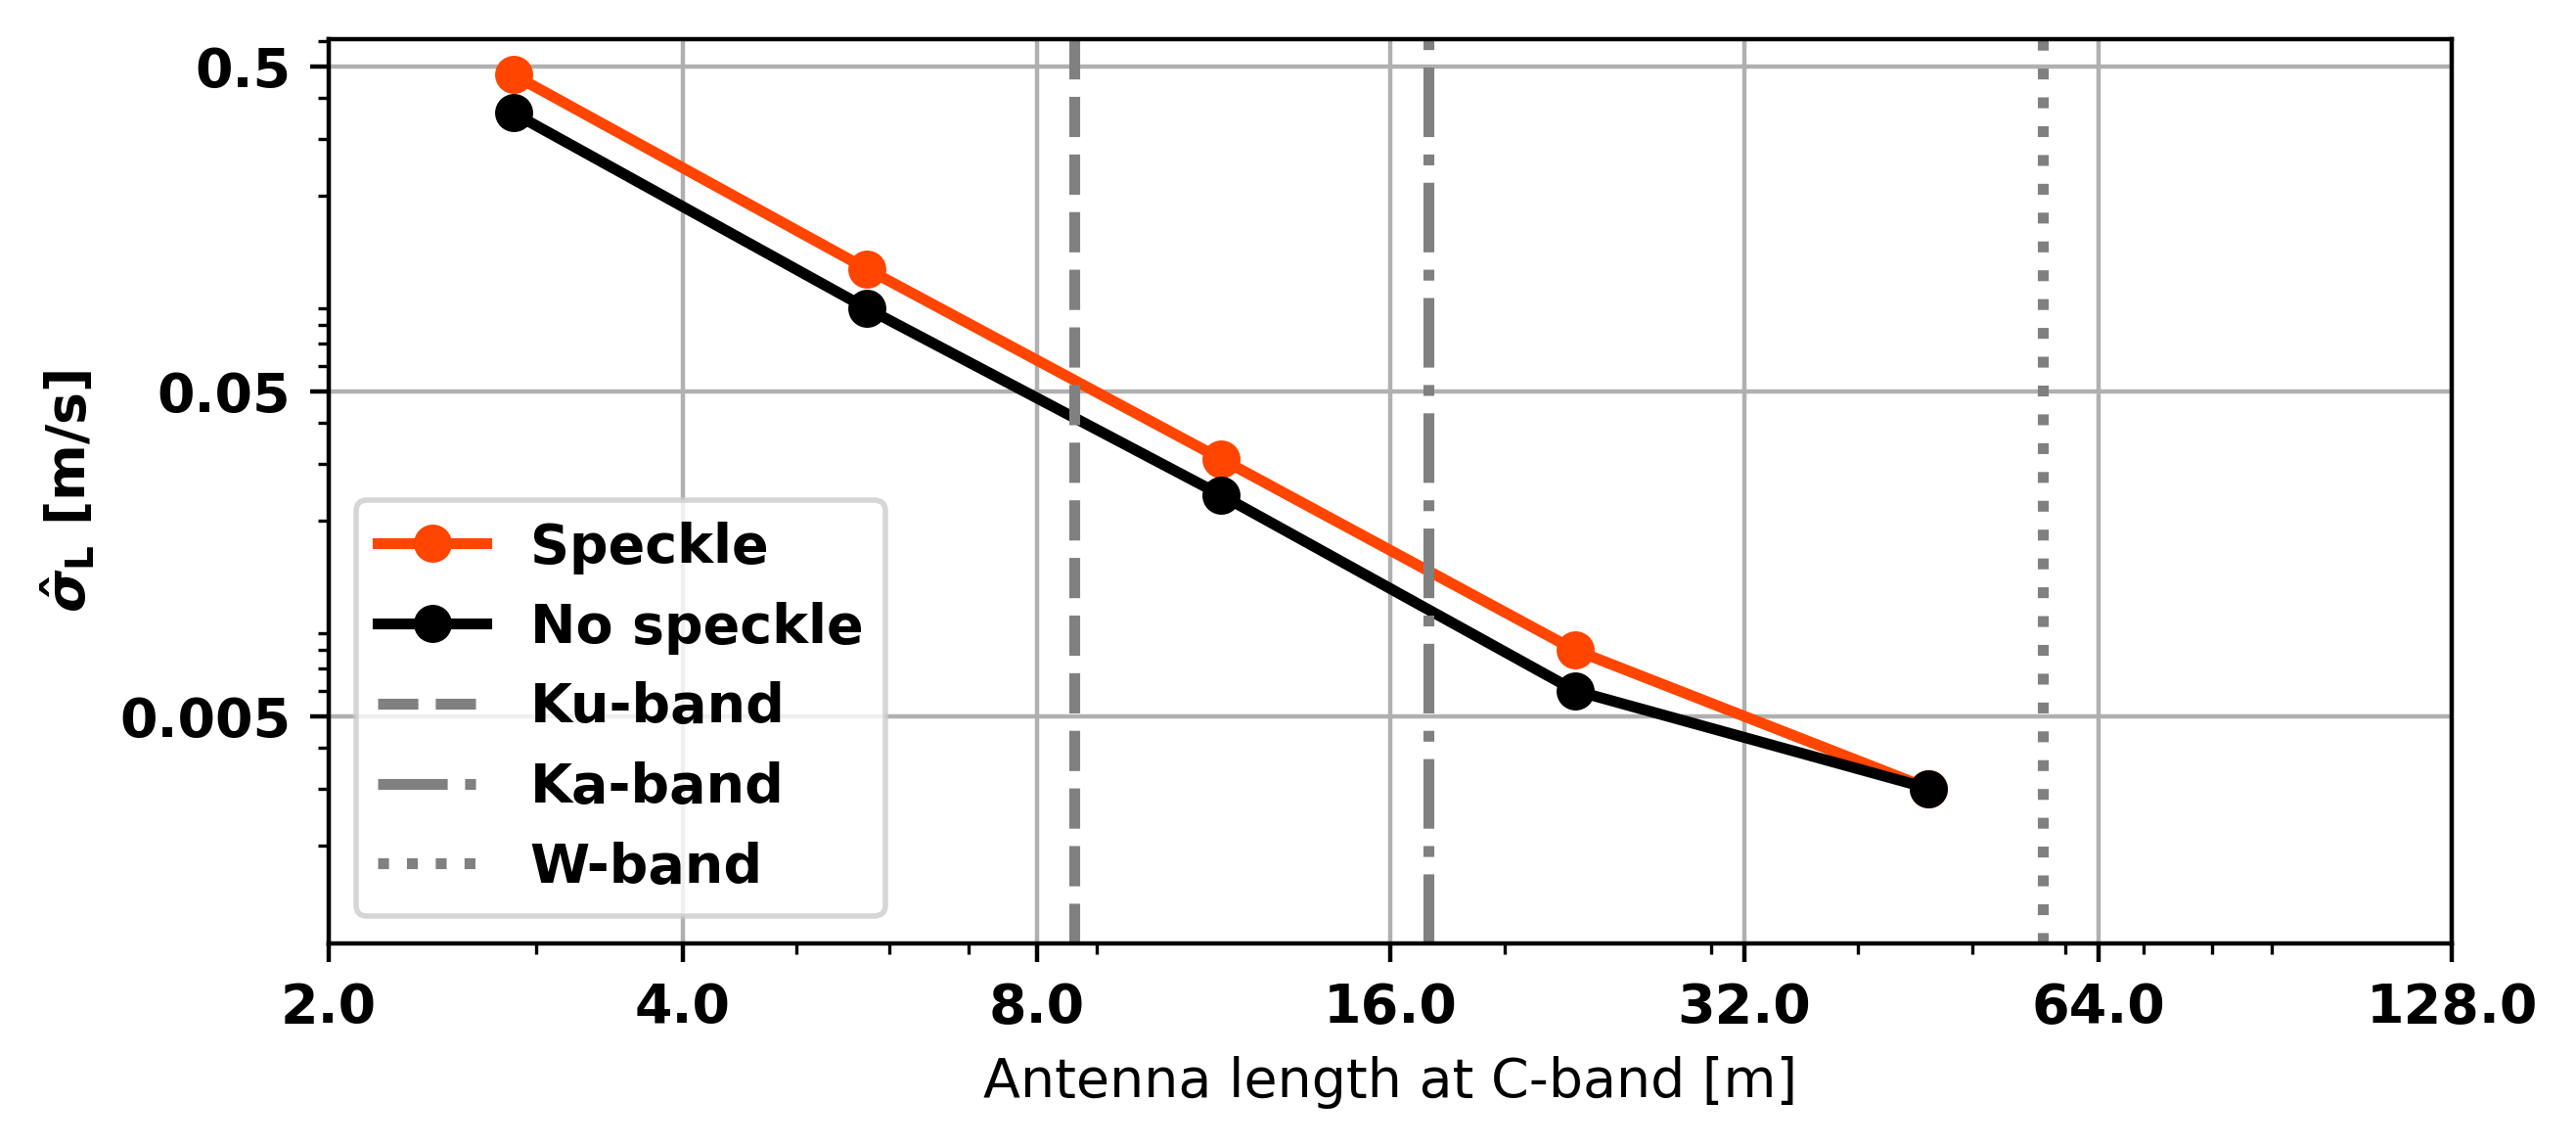

In [13]:
plt.rcParams.update({'font.size': 10, 'font.weight' : 'bold'})
fig, axes = plt.subplots(1, 1, figsize = (7, 3), sharex=True, sharey=True)

lw = 2
ds_res['residual'].isel(speckle = 0).groupby('la',squeeze=False).map(func_rmse_xr).plot(ax = axes, marker = 'o', lw = lw, label = 'Speckle', c = 'orangered')
ds_res['residual'].isel(speckle = 1).groupby('la',squeeze=False).map(func_rmse_xr).plot(ax = axes, marker = 'o', lw = lw, label = 'No speckle', c = 'k')
la = 2.87
eq_ku_band = 3 * la
eq_ka_band = 6 * la
eq_w_band = 20 * la

color_limits = 'gray'

plt.axvline(x=eq_ku_band, lw = lw, ls = '--', label = 'Ku-band', c = color_limits)
plt.axvline(x=eq_ka_band, lw = lw, ls = '-.', label = 'Ka-band', c = color_limits)
plt.axvline(x=eq_w_band, lw = lw, ls = ':', label = 'W-band', c = color_limits)
plt.xlabel('Antenna length at C-band [m]')
plt.ylabel(r'$\hat{\sigma}_{\mathrm{L}}\ \mathrm{[m/s]}$')
plt.yscale('log')
plt.xscale('log')
plt.title('')
plt.xlim([0, 65])
plt.legend()


start, end = axes.get_xlim()
# axes.xaxis.set_ticks(np.logspace(np.log10(2), np.log10(2)*7, 8))
axes.xaxis.set_ticks(2**np.arange(1, 8))
axes.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

start, end = axes.get_ylim()
axes.yaxis.set_ticks(np.array([0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]))
axes.yaxis.set_ticks(np.array([0.005, 0.05, 0.5]))
# axes.yaxis.set_ticks(0.001 * 2**np.arange(1, 10))
axes.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3g'))

plt.grid()
fig.set_dpi(400.0) 

# Load all data

In [4]:
version = 0
data_dir = '../../data/leakage/temp/'
saved_files = glob.glob(f'{data_dir}*param_v{version}.nc')
saved_files.sort()

# sorting sets Azores at the top, which is what we want
saved_files

['../../data/leakage/temp/azores_design_param_v0.nc',
 '../../data/leakage/temp/carib_design_param_v0.nc',
 '../../data/leakage/temp/hawaii_design_param_v0.nc',
 '../../data/leakage/temp/iceland_design_param_v0.nc',
 '../../data/leakage/temp/scotland_design_param_v0.nc']

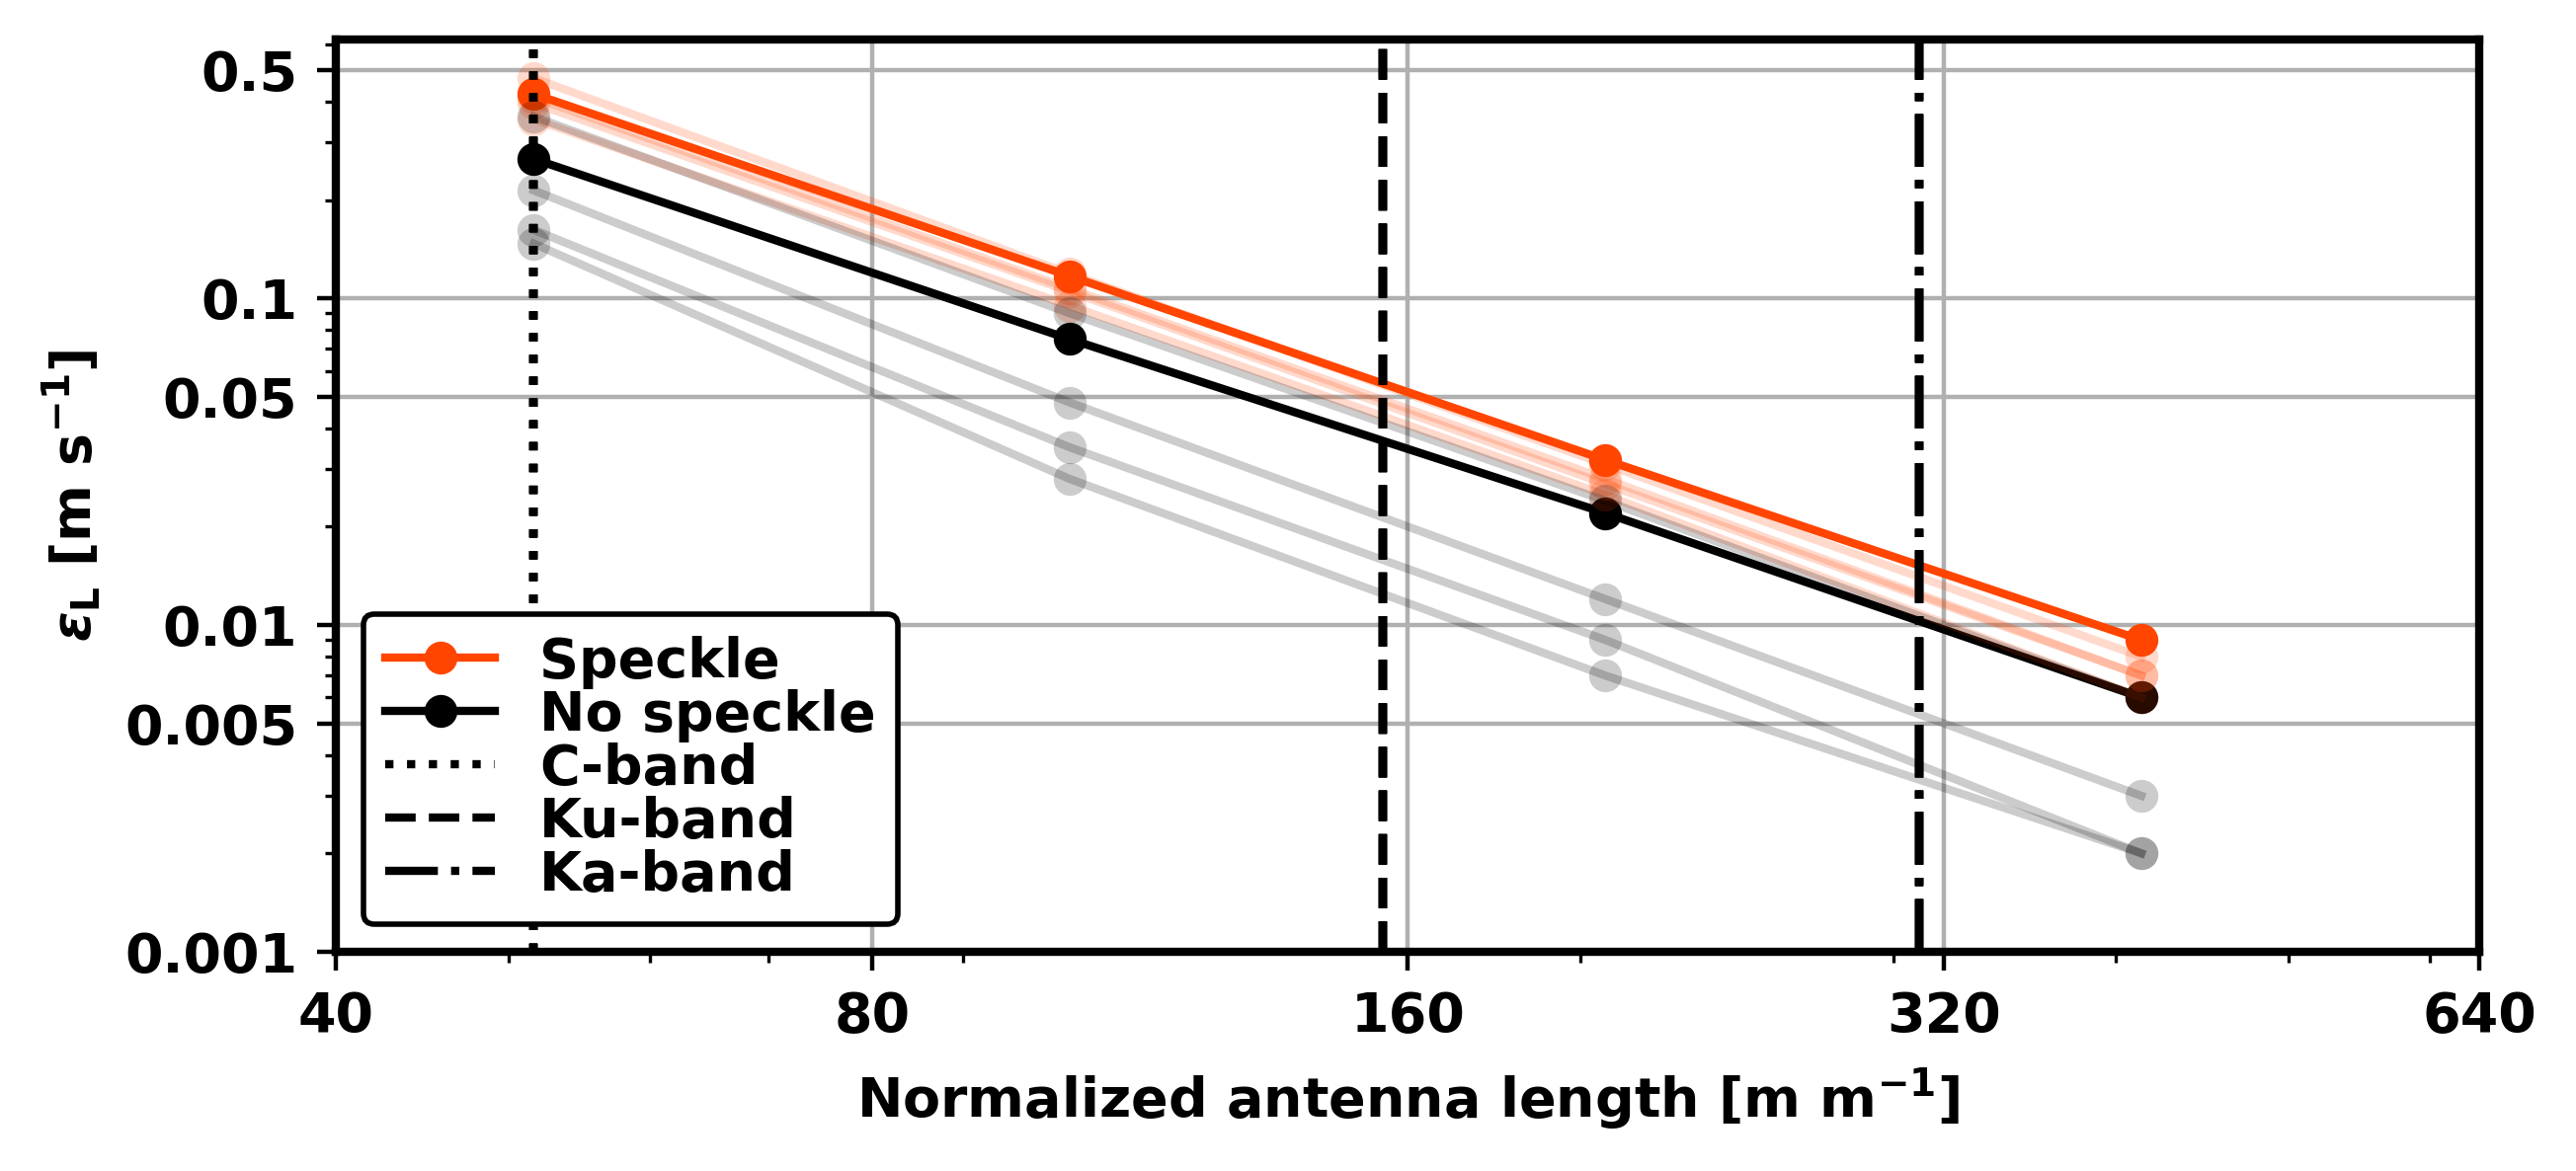

In [6]:
plt.rcParams.update({'font.size': 10, 'font.weight' : 'bold', 'axes.linewidth': 1.5})
fig, axes = plt.subplots(1, 1, figsize = (7, 3), sharex=True, sharey=True)

lw = 1.5
ms = 6
Lambda = 0.0555556
markeredgewidth = 0
alpha1 = 1
color_limits = 'k'
la = 2.87
eq_c_band = 1 * la /Lambda
eq_ku_band = 3 * la /Lambda
eq_ka_band = 6 * la /Lambda
eq_w_band = 20 * la /Lambda

for i, saved_file in enumerate(saved_files):
    if 'azores' in saved_file:
        alpha = 1
    else:
        alpha = 0.2

    ds_res = xr.open_dataset(saved_file).isel(la = slice(0, 4))
    ds_res = ds_res.assign_coords(la = (ds_res.la / Lambda))
    clip = ds_res['residual']/ds_res['residual']
    ds_res['noise'] = ds_res['noise'] * clip

    ds_residual_mean = ds_res['residual'].mean(dim = 'la')
    ds_residual_std = ds_res['residual'].std(dim = 'la')
    ds_noise_mean = ds_res['noise'].mean(dim = 'la')

    ds_res['residual'].isel(speckle = 0).groupby('la',squeeze=False).map(func_rmse_xr).plot(ax = axes, marker = 'o', lw = lw, ms = ms, markeredgewidth=markeredgewidth, alpha = alpha, label = 'Speckle', c = 'orangered')
    ds_res['residual'].isel(speckle = 1).groupby('la',squeeze=False).map(func_rmse_xr).plot(ax = axes, marker = 'o', lw = lw, ms = ms, markeredgewidth=markeredgewidth, alpha = alpha, label = 'No speckle', c = 'k')

    plt.axvline(x=eq_c_band, lw = lw, alpha = alpha1, ls = ':', label = 'C-band', c = color_limits)
    plt.axvline(x=eq_ku_band, lw = lw, alpha = alpha1, ls = '--', label = 'Ku-band', c = color_limits)
    plt.axvline(x=eq_ka_band, lw = lw, alpha = alpha1, ls = '-.', label = 'Ka-band', c = color_limits)
    # plt.axvline(x=eq_w_band, lw = lw, ls = ':', label = 'W-band', c = color_limits)
    plt.xlabel(r'$\mathrm{Normalized\ antenna\ length\ [m\ m^{-1}]}$')
    plt.ylabel(r'$\epsilon_{\mathrm{L}}\ \mathrm{[m\ s^{-1}]}$')
    plt.yscale('log')
    plt.xscale('log')
    plt.title('')
    # plt.xlim([0, 65])
    if i == 0:
        # plt.legend(ncol = 1)
        legend = plt.legend(loc="lower left", facecolor = 'w', framealpha=1, ncol = 1, frameon = True, markerscale=1, labelspacing=0, columnspacing =0.75)

legend.set_zorder(100)
frame = legend.get_frame()
frame.set_facecolor('w')
frame.set_edgecolor('k')

# legend.legendPatch.set_facecolor("w")
# legend.legendPatch.set_edgecolor("#a9a9a9")
# for i, text in enumerate(legend.get_texts()):
#     # text.set_rotation(20)
#     # text.set_text(f"Label {i}")
#     # text.set_backgroundcolor("#d1afe8")
#     text.set_fontsize(10)
    # text.set_alpha(0.3)

start, end = axes.get_xlim()
# axes.xaxis.set_ticks(2**np.arange(1, 6))
axes.xaxis.set_ticks(40 * 2**np.arange(0, 5))
# b = plt.gca()
# b.set_xticklabels(list(np.round(2**np.arange(1, 6) / 0.056, 2)))
# axes.xaxis.set_xticklabels(2**np.arange(1, 6) / 0.056)
axes.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))

start, end = axes.get_ylim()
axes.set_yticks(np.array([0.001, 0.005, 0.01, 0.05, 0.1, 0.5]))
axes.set_yticklabels(labels = [None, 0.005, None, 0.05, None, 0.5])

# axes.yaxis.set_ticks(np.array([0.001, 0.005, 0.01, 0.05, 0.1, 0.5]), labels = )
# axes.yaxis.set_ticks(np.array([0.005, 0.05, 0.5]))
# axes.yaxis.set_ticks(0.001 * 2**np.arange(1, 10))
axes.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3g'))

plt.grid()
fig.set_dpi(400.0) 